In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gseapy as gp


import scanpy as sc
import anndata as ad
import muon as mu
from muon import MuData 

import mowgli
from mowgli.models import MowgliModel
from mowgli.tl import enrich

In [3]:
rna_df = pd.read_csv('gbm_rnaseq.csv', index_col=0)
proteome_df = pd.read_csv('gbm_proteomics.csv', index_col=0)
methylation_df = pd.read_csv('gbm_methylation.csv', index_col=0)

phenotype_df = pd.read_csv('gbm_phenotype.csv', index_col=0)
survival_df = pd.read_csv('gbm_survival.csv', index_col=0)

In [ ]:
# AnnData objects

adata_rna = ad.AnnData(X=rna_df.values.T,
                    var=pd.DataFrame(index=rna_df.index),  
                    obs=pd.DataFrame(index=rna_df.columns)) 
adata_prot = ad.AnnData(X=proteome_df.values.T,
                     var=pd.DataFrame(index=proteome_df.index), 
                     obs=pd.DataFrame(index=proteome_df.columns))  
adata_methylation = ad.AnnData(X=methylation_df.values.T,
                            var=pd.DataFrame(index=methylation_df.index),  
                            obs=pd.DataFrame(index=methylation_df.columns))  

In [ ]:
# adding the phenotype_df to the .obs of each AnnData objects

adata_rna.obs = adata_rna.obs.join(phenotype_df, how='left')
adata_prot.obs = adata_prot.obs.join(phenotype_df, how='left')
adata_methylation.obs = adata_methylation.obs.join(phenotype_df, how='left')


/home/azureuser/.local/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:385: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)
/home/azureuser/.local/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/home/azureuser/.local/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:412: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(msg, UserWarning)
/home/azureuser/.local/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:696: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}


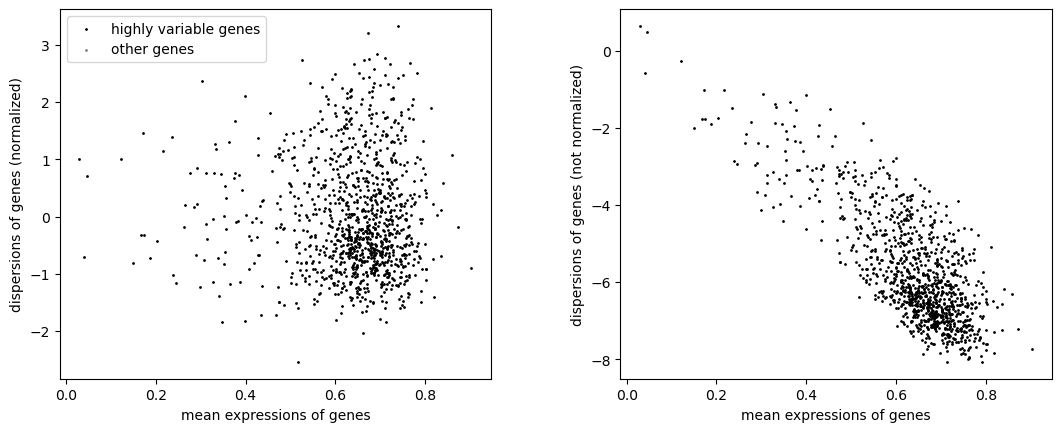

In [ ]:
sc.pp.log1p(adata_rna)
adata_rna = adata_rna[:, ~adata_rna.var_names.isnull()] # rem. NaN value genes

gene_var = adata_rna.X.var(axis=0)  # rem. genes with zero variance
adata_rna = adata_rna[:, gene_var > 0]

#   highly variable genes
sc.pp.highly_variable_genes(adata_rna,
                          min_mean=0.0125,
                          max_mean=3,
                          min_disp=0.5,
                          n_top_genes=2000)


sc.pl.highly_variable_genes(adata_rna)

/home/azureuser/.local/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:385: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)
/home/azureuser/.local/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/home/azureuser/.local/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:696: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}


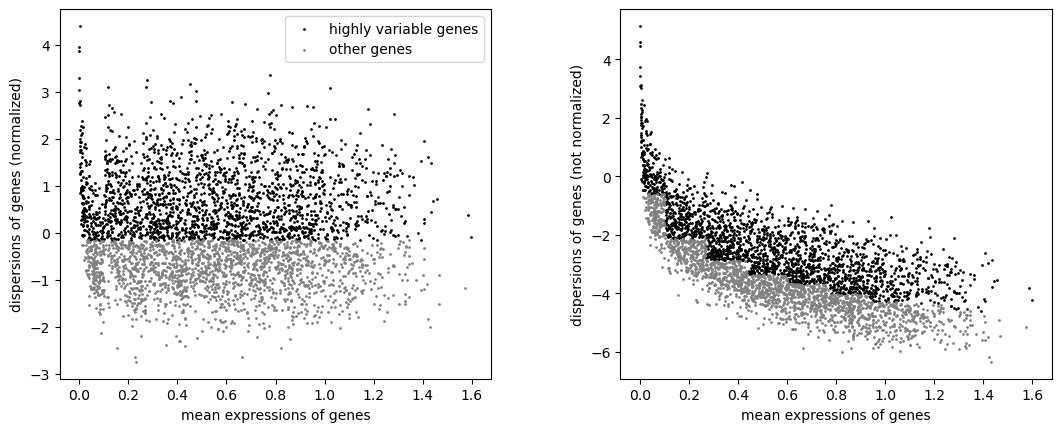

In [ ]:
## Now for proteins

sc.pp.log1p(adata_prot)
adata_prot = adata_prot[:, ~adata_prot.var_names.isnull()]
prot_var = adata_prot.X.var(axis=0)
adata_prot = adata_prot[:, prot_var > 0]
sc.pp.highly_variable_genes(adata_prot,
                          min_mean=0.0125,
                          max_mean=3,
                          min_disp=0.5,
                          n_top_genes=2000)

sc.pl.highly_variable_genes(adata_prot)

/home/azureuser/.local/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:385: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)
/home/azureuser/.local/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/home/azureuser/.local/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:412: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(msg, UserWarning)
/home/azureuser/.local/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:696: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}


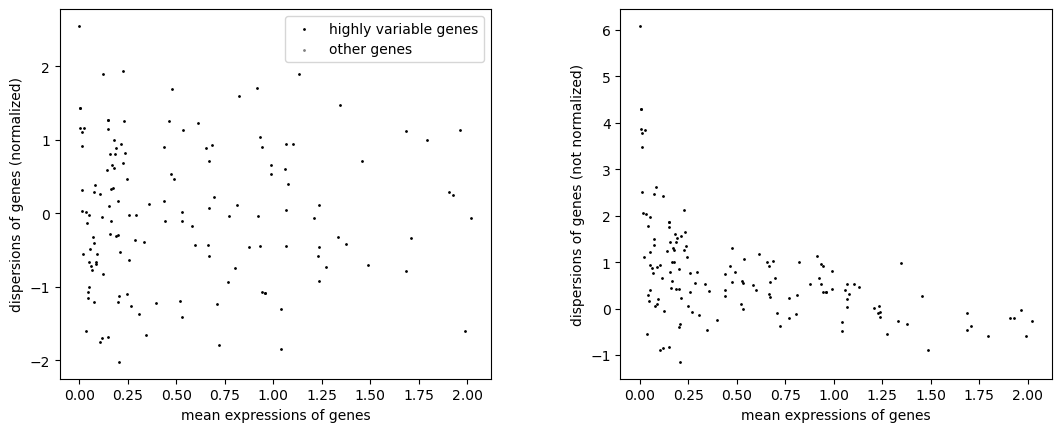

In [ ]:
# And also for methylation data:

sc.pp.log1p(adata_methylation)
adata_methylation = adata_methylation[:, ~adata_methylation.var_names.isnull()]
meth_var = adata_methylation.X.var(axis=0)
adata_methylation = adata_methylation[:, meth_var > 0]
sc.pp.highly_variable_genes(adata_methylation,
                          min_mean=0.0125,
                          max_mean=3,
                          min_disp=0.5,
                          n_top_genes=2000)

sc.pl.highly_variable_genes(adata_methylation)

In [ ]:
# MUDATA Object
mdata = MuData({'rna': adata_rna, 'prot': adata_prot, 'methylation': adata_methylation})
mdata.write('mdata_preprocessed_v.h5ad')

In [21]:
mdata

MuData object with n_obs × n_vars = 97 × 7534
  3 modalities
    rna:	97 x 1104
      obs:	'CIBERSORT_B_cell_naive', 'CIBERSORT_B_cell_memory', 'CIBERSORT_B_cell_plasma', 'CIBERSORT_T_cell_CD8+', 'CIBERSORT_T_cell_CD4+_naive', 'CIBERSORT_T_cell_CD4+_memory_resting', 'CIBERSORT_T_cell_CD4+_memory_activated', 'CIBERSORT_T_cell_follicular_helper', 'CIBERSORT_T_cell_regulatory_(Tregs)', 'CIBERSORT_T_cell_gamma_delta', 'CIBERSORT_NK_cell_resting', 'CIBERSORT_NK_cell_activated', 'CIBERSORT_Monocyte', 'CIBERSORT_Macrophage_M0', 'CIBERSORT_Macrophage_M1', 'CIBERSORT_Macrophage_M2', 'CIBERSORT_Myeloid_dendritic_cell_resting', 'CIBERSORT_Myeloid_dendritic_cell_activated', 'CIBERSORT_Mast_cell_activated', 'CIBERSORT_Mast_cell_resting', 'CIBERSORT_Eosinophil', 'CIBERSORT_Neutrophil', 'ESTIMATE_StromalScore', 'ESTIMATE_ImmuneScore', 'ESTIMATE_ESTIMATEScore', 'PROGENy_Androgen', 'PROGENy_EGFR', 'PROGENy_Estrogen', 'PROGENy_Hypoxia', 'PROGENy_JAK-STAT', 'PROGENy_MAPK', 'PROGENy_NFkB', 'PROGENy_p53', 'PROGENy_PI3K', 'PROGENy_TGFb', 'PROGENy_TNFa', 'PROGENy_Trail', 'PROGENy_VEGF', 'PROGENy_WNT', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK_HYPOXIA', 'HALLMARK_CHOLESTEROL_HOMEOSTASIS', 'HALLMARK_MITOTIC_SPINDLE', 'HALLMARK_WNT_BETA_CATENIN_SIGNALING', 'HALLMARK_TGF_BETA_SIGNALING', 'HALLMARK_IL6_JAK_STAT3_SIGNALING', 'HALLMARK_DNA_REPAIR', 'HALLMARK_G2M_CHECKPOINT', 'HALLMARK_APOPTOSIS', 'HALLMARK_NOTCH_SIGNALING', 'HALLMARK_ADIPOGENESIS', 'HALLMARK_ESTROGEN_RESPONSE_EARLY', 'HALLMARK_ESTROGEN_RESPONSE_LATE', 'HALLMARK_ANDROGEN_RESPONSE', 'HALLMARK_MYOGENESIS', 'HALLMARK_PROTEIN_SECRETION', 'HALLMARK_INTERFERON_ALPHA_RESPONSE', 'HALLMARK_INTERFERON_GAMMA_RESPONSE', 'HALLMARK_APICAL_JUNCTION', 'HALLMARK_APICAL_SURFACE', 'HALLMARK_HEDGEHOG_SIGNALING', 'HALLMARK_COMPLEMENT', 'HALLMARK_UNFOLDED_PROTEIN_RESPONSE', 'HALLMARK_PI3K_AKT_MTOR_SIGNALING', 'HALLMARK_MTORC1_SIGNALING', 'HALLMARK_E2F_TARGETS', 'HALLMARK_MYC_TARGETS_V1', 'HALLMARK_MYC_TARGETS_V2', 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION', 'HALLMARK_INFLAMMATORY_RESPONSE', 'HALLMARK_XENOBIOTIC_METABOLISM', 'HALLMARK_FATTY_ACID_METABOLISM', 'HALLMARK_OXIDATIVE_PHOSPHORYLATION', 'HALLMARK_GLYCOLYSIS', 'HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY', 'HALLMARK_P53_PATHWAY', 'HALLMARK_UV_RESPONSE_UP', 'HALLMARK_UV_RESPONSE_DN', 'HALLMARK_ANGIOGENESIS', 'HALLMARK_HEME_METABOLISM', 'HALLMARK_COAGULATION', 'HALLMARK_IL2_STAT5_SIGNALING', 'HALLMARK_BILE_ACID_METABOLISM', 'HALLMARK_PEROXISOME', 'HALLMARK_ALLOGRAFT_REJECTION', 'HALLMARK_SPERMATOGENESIS', 'HALLMARK_KRAS_SIGNALING_UP', 'HALLMARK_KRAS_SIGNALING_DN', 'HALLMARK_PANCREAS_BETA_CELLS', 'xCell_Myeloid_dendritic_cell_activated', 'xCell_B_cell', 'xCell_T_cell_CD4+_memory', 'xCell_T_cell_CD4+_naive', 'xCell_T_cell_CD4+_(non-regulatory)', 'xCell_T_cell_CD4+_central_memory', 'xCell_T_cell_CD4+_effector_memory', 'xCell_T_cell_CD8+_naive', 'xCell_T_cell_CD8+', 'xCell_T_cell_CD8+_central_memory', 'xCell_T_cell_CD8+_effector_memory', 'xCell_Class-switched_memory_B_cell', 'xCell_Common_lymphoid_progenitor', 'xCell_Common_myeloid_progenitor', 'xCell_Myeloid_dendritic_cell', 'xCell_Endothelial_cell', 'xCell_Eosinophil', 'xCell_Cancer_associated_fibroblast', 'xCell_Granulocyte-monocyte_progenitor', 'xCell_Hematopoietic_stem_cell', 'xCell_Macrophage', 'xCell_Macrophage_M1', 'xCell_Macrophage_M2', 'xCell_Mast_cell', 'xCell_B_cell_memory', 'xCell_Monocyte', 'xCell_B_cell_naive', 'xCell_Neutrophil', 'xCell_NK_cell', 'xCell_T_cell_NK', 'xCell_Plasmacytoid_dendritic_cell', 'xCell_B_cell_plasma', 'xCell_T_cell_gamma_delta', 'xCell_T_cell_CD4+_Th1', 'xCell_T_cell_CD4+_Th2', 'xCell_T_cell_regulatory_(Tregs)', 'xCell_immune_score', 'xCell_stroma_score', 'xCell_microenvironment_score', 'PTM_SEA_PERT-PSP_SII_ANGIOTENSIN_2', 'PTM_SEA_PERT-PSP_PHORBOL_ESTER', 'PTM_SEA_PERT-PSP_NOCODAZOLE', 'PTM_SEA_PERT-PSP_INSULIN', 'PTM_SEA_PERT-PSP_IGF_1', 'PTM_SEA_PERT-PSP_EGF', 'PTM_SEA_PERT-PSP_ANTI_CD3', 'PTM_SEA_PERT-P100-PRM_VORINOSTAT', 'PTM_SEA_PERT-P100-PRM_DMSO', 'PTM_SEA_PER

In [ ]:
## Init. MOWGLI MODEL

model = MowgliModel(
    latent_dim=20,
    use_mod_weight=False, 
    h_regularization=1.0,
    w_regularization=1.0,
    eps=0.1,
)

model.train(mdata)

  2%|▏         | 4/200 [01:49<1:29:48, 27.49s/it, loss=-8.931652, mass_transported=0.99, loss_inner=4.454673, inner_steps=50, gpu_memory_allocated=0]   


/tmp/ipykernel_3466/3231776507.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(mdata)


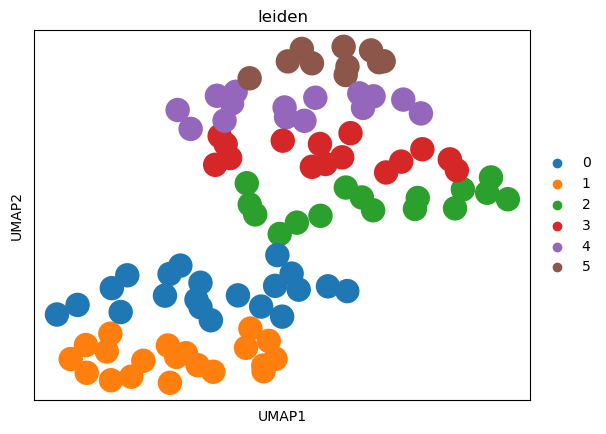

In [ ]:
sc.pp.neighbors(mdata, use_rep="W_OT")
sc.tl.umap(mdata)
sc.tl.leiden(mdata)

sc.pl.umap(mdata, color="leiden", save="mowgli_umap2.png")

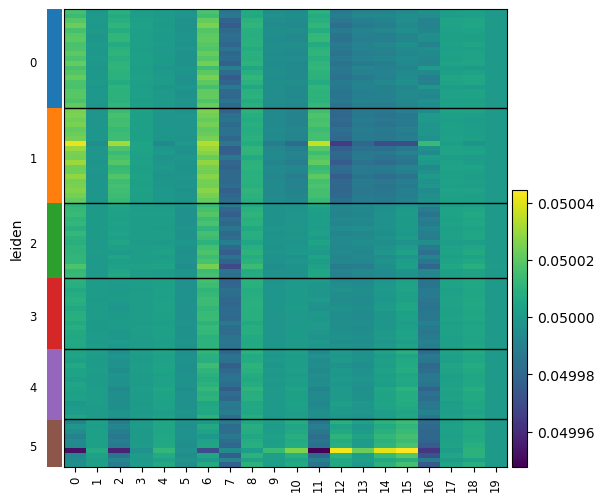

In [27]:
mowgli.pl.heatmap(mdata, obsm="W_OT", groupby="leiden", save="mowgli_heatmap2.png")

In [ ]:

# Enrichment analysis
enriched_terms = enrich(mdata)
enriched_terms

(Empty DataFrame
 Columns: [source, native, name, p_value, significant, description, term_size, query_size, intersection_size, effective_domain_size, precision, recall, query, parents]
 Index: [],
 nan)

In [48]:
print(mdata.mod['rna'].uns['H_OT'])

[[0.00092945 0.00092945 0.00092945 ... 0.00092945 0.00092945 0.00092945]
 [0.00092892 0.00092891 0.00092892 ... 0.00092892 0.00092892 0.00092891]
 [0.0009295  0.0009295  0.0009295  ... 0.0009295  0.0009295  0.0009295 ]
 ...
 [0.00091339 0.00091339 0.00091339 ... 0.00091339 0.00091339 0.00091339]
 [0.00093083 0.00093082 0.00093082 ... 0.00093082 0.00093082 0.00093082]
 [0.00093048 0.00093048 0.00093048 ... 0.00093048 0.00093048 0.00093048]]


In [ ]:

hv_genes = mdata.mod['rna'].var_names[mdata.mod['rna'].var['highly_variable']]

H_OT = pd.DataFrame(
    mdata.mod['rna'].uns['H_OT'],
    index=hv_genes
)

In [54]:
H_OT

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
idx,,,,,,,,,,,,,,,,,,,,
ENSG00000160789.20,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929
ENSG00000162300.13,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929
ENSG00000138867.16,0.000930,0.000930,0.000930,0.000930,0.000930,0.000929,0.000930,0.000929,0.000930,0.000929,0.000930,0.000930,0.000929,0.000929,0.000929,0.000930,0.000929,0.000930,0.000930,0.000930
ENSG00000111731.12,0.000930,0.000930,0.000930,0.000930,0.000930,0.000930,0.000930,0.000930,0.000930,0.000930,0.000930,0.000930,0.000930,0.000930,0.000930,0.000930,0.000930,0.000930,0.000930,0.000930
ENSG00000143303.12,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000007202.15,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931
ENSG00000130725.8,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929
ENSG00000109113.20,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913


In [ ]:

component = H_OT.iloc[:, 0]
component

idx
ENSG00000160789.20    0.000929
ENSG00000162300.13    0.000929
ENSG00000138867.16    0.000930
ENSG00000111731.12    0.000930
ENSG00000143303.12    0.000929
                        ...   
ENSG00000007202.15    0.000931
ENSG00000130725.8     0.000929
ENSG00000109113.20    0.000913
ENSG00000164880.16    0.000931
ENSG00000089693.10    0.000930
Name: 0, Length: 1102, dtype: float32

In [ ]:
# top 500 genes
top_genes = ranked_genes.head(500).index.tolist()

In [60]:
enr = gp.enrichr(
    gene_list=top_genes,
    gene_sets=['GO_Biological_Process_2018', 'Reactome_2016'],
    organism='Human',
    outdir='enrichr_results',
    cutoff=0.5,
    no_plot=True
)

In [61]:
# View the top enrichment results
enr.res2d.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
